In [1]:
import sys
import pickle
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from dvclive import Live

live = Live(save_dvc_exp=True)

In [3]:
import pathlib
 
# current working directory
print(pathlib.Path().absolute())

/Users/blarhdir/Documents/sw-data-mlops-internship/mlpipeline/notebooks

### PARAMS

In [4]:
UTILS_DIR = "./"
DATA_DIR = '../data/'
DATA_NAME =  'train_data_cleaning.csv'

In [5]:
# Parameters
UTILS_DIR = "./"
DATA_DIR = "../data/"
DATA_NAME = "train_data_cleaning.csv"


### Added by DataScientists

### Added by DataScientists

### Added by DataScientists

In [6]:
sys.path.append(UTILS_DIR)

from utils.clean_text import clean_text
from utils.counter_word import counter_word
from utils.plot_target import plot_target

[nltk_data] Downloading package punkt to /Users/blarhdir/nltk_data...

[nltk_data]   Package punkt is already up-to-date!

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blarhdir/nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

### Added by DataScientists

## DATA PREPROCESSING

In [7]:
train_df = pd.read_csv(DATA_DIR + DATA_NAME)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [11]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [12]:
train_df.location.value_counts()[:10]

location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64

Text(0, 0.5, 'Count')

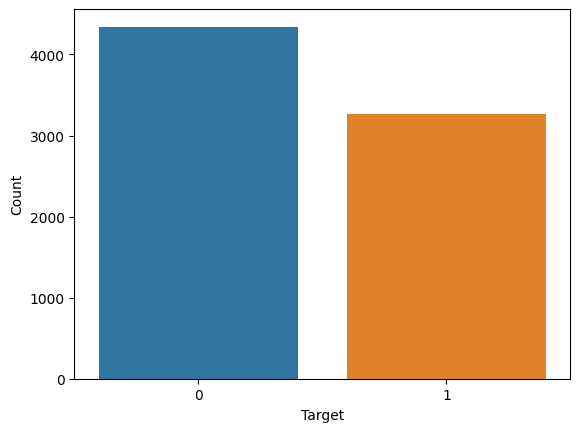

In [13]:
counts =train_df['target'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Target')
plt.ylabel('Count')

In [14]:
train_df['Text_length'] = train_df['text'].apply(len)

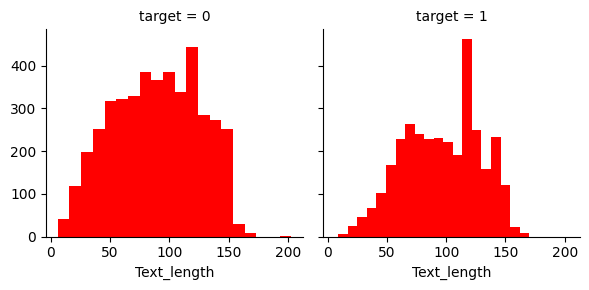

In [15]:
length_text = sns.FacetGrid(data=train_df, col='target')
length_text.map(plt.hist, 'Text_length', bins=20, color='r')

In [16]:
train_df.drop(['id','location','keyword'], axis=1, inplace=True)

In [17]:
train_df.isnull().sum()

text           0
target         0
Text_length    0
dtype: int64

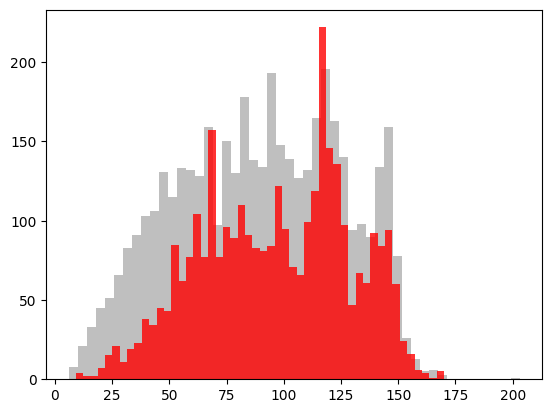

In [18]:
plot_target(train_df, "Text_length")

In [19]:
train_df['words_counts'] = train_df.text.str.split().map(lambda x: len(x))

In [20]:
train_df.head()

,text,target,Text_length,words_counts
0,Our Deeds are the Reason of this # earthquake...,1,71,14
1,Forest fire near La Ronge Sask . Canada,1,40,8
2,All residents asked to ' shelter in place ' ...,1,139,25
3,"13,000 people receive # wildfires evacuation ...",1,67,9
4,Just got sent this photo from Ruby # Alaska a...,1,92,18


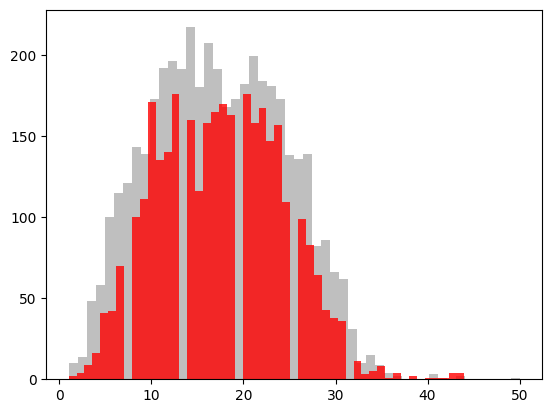

In [21]:
plot_target(train_df, "words_counts")

In [22]:
train_df['unique_word_count'] = train_df.text.map(lambda x: len(set(str(x).split())))

In [23]:
train_df.head()

,text,target,Text_length,words_counts,unique_word_count
0,Our Deeds are the Reason of this # earthquake...,1,71,14,14
1,Forest fire near La Ronge Sask . Canada,1,40,8,8
2,All residents asked to ' shelter in place ' ...,1,139,25,20
3,"13,000 people receive # wildfires evacuation ...",1,67,9,9
4,Just got sent this photo from Ruby # Alaska a...,1,92,18,16


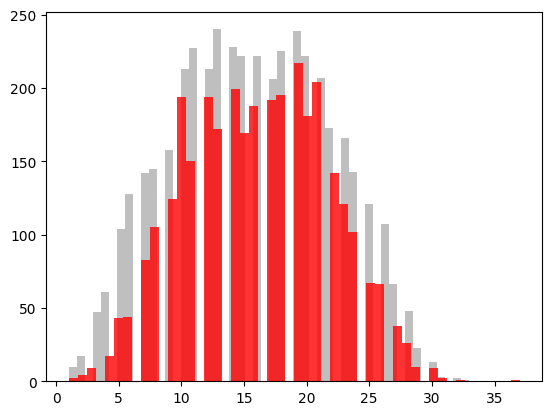

In [24]:
plot_target(train_df, 'unique_word_count')

In [25]:
train_df['punctuation_count'] = train_df['text'].map(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [26]:
train_df.head()

,text,target,Text_length,words_counts,unique_word_count,punctuation_count
0,Our Deeds are the Reason of this # earthquake...,1,71,14,14,1
1,Forest fire near La Ronge Sask . Canada,1,40,8,8,1
2,All residents asked to ' shelter in place ' ...,1,139,25,20,3
3,"13,000 people receive # wildfires evacuation ...",1,67,9,9,2
4,Just got sent this photo from Ruby # Alaska a...,1,92,18,16,2


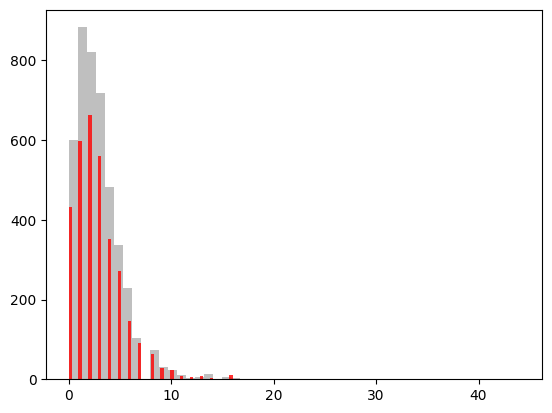

In [27]:
plot_target(train_df, 'punctuation_count')

In [28]:
train_df['Text_cleaning'] = train_df.text.apply(clean_text)

In [29]:
x_1 = train_df[train_df.target == 1]["Text_cleaning"]
x_0 = train_df[train_df.target == 0]["Text_cleaning"]

In [30]:
X = train_df['Text_cleaning']
y = train_df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
count_vectorizer = CountVectorizer()
train_counts = count_vectorizer.fit_transform(train_df['Text_cleaning'])

In [33]:
text = train_df['Text_cleaning']
counter = counter_word(text)

In [34]:
len(counter)

15684

In [35]:
live.log_metric("len_counter", len(counter))

### OUTPUTS

In [36]:
pickle.dump(X, open(DATA_DIR + "X.pckl", "wb"))
pickle.dump(X_train, open(DATA_DIR + "X_train.pckl", "wb"))
pickle.dump(X_test, open(DATA_DIR +"X_test.pckl", "wb"))

pickle.dump(y, open(DATA_DIR + "y.pckl", "wb"))
pickle.dump(y_train, open(DATA_DIR + "y_train.pckl", "wb"))
pickle.dump(y_test, open(DATA_DIR + "y_test.pckl", "wb"))

In [37]:
pickle.dump(counter, open(DATA_DIR + "counter.pckl", "wb"))

### Added by DataScientists

### Added by DataScientists